# **Основы клиент-серверного взаимодействия. Парсинг API
# Практическая работа 1. Начало работы с API.**

Приступаю к выполнению задания "Выполнить анализ данных датасета Kuggle обновленный в 2023 году согласно варианта. Мой вариант №7 - BUSINESS.

Начну со скачивания наборов данных Kaggle.

# Скачивание наборов данных Kaggle

1. **Создание ключа `API` в `Kaggle`**.

Создаю новый токен API в учетной записи Kaggle.

После этого скачиваю токен на компьютер. Будет загружен файл `kaggle.json`.
Далее использую скрипт для загрузки файла `kaggle.json`с помощью кода:

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"skailains","key":"b97676775ae7e6b0aec611e6098329f1"}'}

Установлю `Kaggle API`:

In [ ]:
!pip install -q kaggle

Перемещу файл `kaggle.json` в **~/.kaggle**, где клиент `API` ожидает расположения токена:

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

С помощью повышения прав предоставлю разрешения на изменение, чтобы избежать предупреждения при запуске инструмента `Kaggle`.

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

Теперь получу доступ к наборам данных с помощью клиента:

In [ ]:
!kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset            Customer Shopping Trends Dataset                146KB  2023-10-05 06:45:37          24994        503  1.0              
joebeachcapital/30000-spotify-songs                           30000 Spotify Songs                               3MB  2023-11-01 06:06:43           3266         77  1.0              
samyakb/student-stress-factors                                Student stress factors                           887B  2023-11-02 12:42:11           3576         68  0.9411765        
carlmcbrideellis/llm-7-prompt-training-dataset                LLM: 7 prompt training datas

In [ ]:
import kaggle

# List of all datasets available on Kaggle
kaggle.api.dataset_list()

[iamsouravbanerjee/customer-shopping-trends-dataset,
 joebeachcapital/30000-spotify-songs,
 samyakb/student-stress-factors,
 carlmcbrideellis/llm-7-prompt-training-dataset,
 jacksondivakarr/online-shopping-dataset,
 imtkaggleteam/plastic-pollution,
 prasad22/healthcare-dataset,
 yekenot/tree-survival-prediction,
 thedrcat/daigt-proper-train-dataset,
 nelgiriyewithana/billionaires-statistics-dataset,
 anshtanwar/top-200-trending-books-with-reviews,
 nelgiriyewithana/world-educational-data,
 alejopaullier/daigt-external-dataset,
 bryanchungweather/nba-player-stats-dataset-for-the-2023-2024,
 alexq1111/imdb-top-rated-english-movies,
 uom190346a/e-commerce-customer-behavior-dataset,
 amirmahdiabbootalebi/salary-by-job-title-and-country,
 zeesolver/consumer-behavior-and-shopping-habits-dataset,
 bishop36/bookstore,
 anandaramg/global-superstore]

Произведу поиск наборов данных на Kaggle по ключевому слову, соответсвующему моему варианту - business:

In [ ]:
datasets = kaggle.api.datasets_list(search="business")
print(datasets)

[{'subtitleNullable': 'Top 250, Top 100 Independents and Future 50', 'creatorNameNullable': 'Michal Bogacz', 'creatorUrlNullable': 'michau96', 'totalBytesNullable': 16166, 'urlNullable': 'https://www.kaggle.com/datasets/michau96/restaurant-business-rankings-2020', 'licenseNameNullable': 'CC0: Public Domain', 'descriptionNullable': None, 'ownerNameNullable': 'Michal Bogacz', 'ownerRefNullable': 'michau96', 'titleNullable': 'Restaurant Business Rankings 2020', 'currentVersionNumberNullable': 1, 'usabilityRatingNullable': 1.0, 'id': 1128256, 'ref': 'michau96/restaurant-business-rankings-2020', 'subtitle': 'Top 250, Top 100 Independents and Future 50', 'hasSubtitle': True, 'creatorName': 'Michal Bogacz', 'hasCreatorName': True, 'creatorUrl': 'michau96', 'hasCreatorUrl': True, 'totalBytes': 16166, 'hasTotalBytes': True, 'url': 'https://www.kaggle.com/datasets/michau96/restaurant-business-rankings-2020', 'hasUrl': True, 'lastUpdated': '2021-01-30T14:20:45.867Z', 'downloadCount': 24431, 'isPr

In [ ]:
!kaggle datasets list -s "business"

ref                                                      title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
michau96/restaurant-business-rankings-2020               Restaurant Business Rankings 2020           16KB  2021-01-30 14:20:45          24431        430  1.0              
gabrielramos87/an-online-shop-business                   E-commerce Business Transaction              7MB  2022-05-14 20:11:48           8477        101  1.0              
tylermorse/retail-business-sales-20172019                Online Business Sales 2017-2019             11KB  2020-03-20 20:43:07          14610        158  1.0              
census/business-and-industry-reports                     Business and Industry Reports                7MB  2017-10-17 23:21:56           538

Установлю pandas для дальнейшего анализа датасета:

In [ ]:
!pip install pandas
import pandas as pd

In [ ]:
datasets = kaggle.api.datasets_list(search="business")
df=pd.DataFrame(datasets)
pd.DataFrame(datasets)

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
0,"Top 250, Top 100 Independents and Future 50",Michal Bogacz,michau96,16166,https://www.kaggle.com/datasets/michau96/resta...,CC0: Public Domain,None,Michal Bogacz,michau96,Restaurant Business Rankings 2020,...,0,147591,430,1,True,1.000000,True,"[{'nameNullable': 'websites', 'descriptionNull...",[],[]
1,Sales transaction of a UK-based e-commerce (on...,Gabriel Ramos,gabrielramos87,6981189,https://www.kaggle.com/datasets/gabrielramos87...,CC0: Public Domain,None,Gabriel Ramos,gabrielramos87,E-commerce Business Transaction,...,0,50819,101,7,True,1.000000,True,"[{'nameNullable': 'business', 'descriptionNull...",[],[]
2,Dataset is actual sales from online store betw...,Tyler Morse,tylermorse,10998,https://www.kaggle.com/datasets/tylermorse/ret...,CC0: Public Domain,None,Tyler Morse,tylermorse,Online Business Sales 2017-2019,...,0,83698,158,2,True,1.000000,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
3,"7,000 economics time series for 1956-2017",Sohier Dane,sohier,6849471,https://www.kaggle.com/datasets/census/busines...,CC0: Public Domain,None,US Census Bureau,census,Business and Industry Reports,...,0,60458,122,1,True,0.823529,True,"[{'nameNullable': 'business', 'descriptionNull...",[],[]
4,From World Bank Open Data,Kaggle Team,kaggleteam,2054047,https://www.kaggle.com/datasets/theworldbank/d...,CC0: Public Domain,None,World Bank,theworldbank,Doing Business,...,0,20114,15,218,True,0.705882,True,"[{'nameNullable': 'business', 'descriptionNull...",[],[]
5,Consumer complaints about issues with business...,Luiz Gerosa,gerosa,79613651,https://www.kaggle.com/datasets/gerosa/procon,CC BY-SA 4.0,None,Luiz Gerosa,gerosa,Consumer Business Complaints in Brazil,...,0,27176,54,3,True,0.882353,True,"[{'nameNullable': 'brazil', 'descriptionNullab...",[],[]
6,Analyzing and Maximizing Online Business Perfo...,The Devastator,thedevastator,6634810,https://www.kaggle.com/datasets/thedevastator/...,Other (specified in description),None,The Devastator,thedevastator,E-Commerce Sales Dataset,...,0,165149,325,2,True,1.000000,True,"[{'nameNullable': 'business', 'descriptionNull...",[],[]
7,A simple Dataset for Polynomial and Linear Reg...,Taseer Mehboob,taseermehboob9,315,https://www.kaggle.com/datasets/taseermehboob9...,CC0: Public Domain,None,Taseer Mehboob,taseermehboob9,Salary Dataset Of Business Levels,...,0,14070,67,1,True,1.000000,True,"[{'nameNullable': 'education', 'descriptionNul...",[],[]
8,4092 business analyst job listings scraped fro...,Larxel,andrewmvd,4595904,https://www.kaggle.com/datasets/andrewmvd/busi...,Other (specified in description),None,Larxel,andrewmvd,Business Analyst Job Listings,...,0,19074,43,1,True,1.000000,True,"[{'nameNullable': 'employment', 'descriptionNu...",[],[]
9,9447 Educational Courses from Business Categor...,JIL KOTHARI,jilkothari,718552,https://www.kaggle.com/datasets/jilkothari/bus...,CC0: Public Domain,None,JIL KOTHARI,jilkothari,Business Courses - Udemy (10k courses),...,0,13164,39,1,True,1.000000,True,"[{'nameNullable': 'business', 'descriptionNull...",[],[]


In [ ]:
df.to_excel("business.xlsx", sheet_name='business')

In [ ]:
from google.colab import files
files.download('business.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Анализ датасета

In [ ]:
!kaggle datasets download -d zeesolver/listing-of-business

listing-of-business.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

with zipfile.ZipFile("listing-of-business.zip","r") as zip_ref:

    # extracting content in the zipfile
    zip_ref.extractall()

In [ ]:
!ls

 business.xlsx	    kaggle.json			        listing-of-business.zip
'kaggle (1).json'  'Listing of Active Businesses.csv'   sample_data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   subtitleNullable              20 non-null     object 
 1   creatorNameNullable           20 non-null     object 
 2   creatorUrlNullable            20 non-null     object 
 3   totalBytesNullable            20 non-null     int64  
 4   urlNullable                   20 non-null     object 
 5   licenseNameNullable           20 non-null     object 
 6   descriptionNullable           0 non-null      object 
 7   ownerNameNullable             20 non-null     object 
 8   ownerRefNullable              20 non-null     object 
 9   titleNullable                 20 non-null     object 
 10  currentVersionNumberNullable  20 non-null     int64  
 11  usabilityRatingNullable       20 non-null     float64
 12  id                            20 non-null     int64  
 13  ref    

In [ ]:
# reading the contents of the "NetFlix.csv"
df = pd.read_csv("Listing of Active Businesses.csv")

# printing first 6 raws of the dataframe
df.head(100)

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION
0,0000000150-0001-5,A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C,NaN,2015 W TEMPLE STREET,LOS ANGELES,90026-4913,2015 TEMPLE 90026-4913,2607 VAN BUREN PLACE,LOS ANGELES,90007-2129,611000.0,"Educational services (including schools, colle...",13,01/01/1991,NaN,NaN
1,0000000156-0001-2,SPRINGBOARD NON-PROFIT CONSUMER CREDIT MANAGEMENT,MONEY MANAGEMENT INTERNATIONAL,1605 W OLYMPIC BLVD #9023,LOS ANGELES,90015-3828,1605 OLYMPIC 90015-3828,NaN,NaN,NaN,523900.0,Other financial investment activities (includi...,1,02/01/1999,NaN,NaN
2,0002842614-0001-2,AUSTIN B CREEK,NaN,3610 W MAGNOLIA BLVD,BURBANK,91505-2913,3610 MAGNOLIA 91505-2913,NaN,NaN,NaN,711510.0,"Independent artists, writers, & performers",0,09/01/2008,NaN,"(34.168, -118.3463)"
3,0003176540-0001-1,SOEUNG CHAING,CAFECAFE,1330 W PACIFIC COAST HIGHWAY SUITE #E,WILMINGTON,90744-2467,1330 PACIFIC COAST 90744-2467,NaN,NaN,NaN,722211.0,Limited-service eating places,15,01/01/2020,NaN,"(33.7901, -118.2804)"
4,0002728984-0001-8,MARIA ALVAREZ,NaN,9625 SYLMAR AVENUE UNIT #23,PANORAMA CITY,91402-1153,9625 SYLMAR 91402-1153,NaN,NaN,NaN,561720.0,Janitorial services,6,01/01/2013,NaN,"(34.2447, -118.4476)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0000111620-0001-4,SOUTHERN CALIFORNIA GRANTMAKERS,NaN,1000 N ALAMEDA STREET SUITE #230,LOS ANGELES,90012-1804,1000 ALAMEDA 90012-1804,NaN,NaN,NaN,NaN,NaN,14,07/01/1984,NaN,"(34.0593, -118.2361)"
96,0002892441-0001-5,LILIA'S MUSIC LESSONS,NaN,1142 E 11TH STREET,LOS ANGELES,90021-2038,1142 11TH 90021,1142 E 11TH STREET,LOS ANGELES,90021-2038,611000.0,"Educational services (including schools, colle...",14,09/01/2015,NaN,"(34.0314, -118.246)"
97,0003141996-0001-4,GENIUS SALES NT LLC,GENIUS LABS,6960 S CENTINELA AVENUE,LOS ANGELES,90230-6305,6960 CENTINELA 90230-6305,556 N DIAMOND BAR BLVD SUITE #101,DIAMOND BAR,91765-1054,424920.0,"Books, periodicals, & newspapers",11,07/15/2019,NaN,"(33.9838, -118.3997)"
98,0000119447-0001-5,PAURAIC CROSSAN,NaN,1661 S BUNDY DRIVE APT #307,LOS ANGELES,90025-2645,1661 BUNDY 90025-2645,NaN,NaN,NaN,235420.0,"Drywall, Plastering, Acoustical, and Insulatio...",11,03/11/1994,NaN,"(34.0374, -118.4601)"


In [ ]:
my_df =df[['BUSINESS NAME','STREET ADDRESS','CITY','ZIP CODE','LOCATION DESCRIPTION','MAILING ADDRESS','MAILING CITY','NAICS','PRIMARY NAICS DESCRIPTION','COUNCIL DISTRICT','LOCATION START DATE','LOCATION']].copy()

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567184 entries, 0 to 567183
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BUSINESS NAME              567184 non-null  object 
 1   STREET ADDRESS             567180 non-null  object 
 2   CITY                       567133 non-null  object 
 3   ZIP CODE                   567184 non-null  object 
 4   LOCATION DESCRIPTION       567158 non-null  object 
 5   MAILING ADDRESS            295019 non-null  object 
 6   MAILING CITY               295036 non-null  object 
 7   NAICS                      504756 non-null  float64
 8   PRIMARY NAICS DESCRIPTION  504756 non-null  object 
 9   COUNCIL DISTRICT           567184 non-null  int64  
 10  LOCATION START DATE        563600 non-null  object 
 11  LOCATION                   549050 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 51.9+ MB


In [ ]:
my_df

,BUSINESS NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION
0,A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C,2015 W TEMPLE STREET,LOS ANGELES,90026-4913,2015 TEMPLE 90026-4913,2607 VAN BUREN PLACE,LOS ANGELES,611000.0,"Educational services (including schools, colle...",13,01/01/1991,NaN
1,SPRINGBOARD NON-PROFIT CONSUMER CREDIT MANAGEMENT,1605 W OLYMPIC BLVD #9023,LOS ANGELES,90015-3828,1605 OLYMPIC 90015-3828,NaN,NaN,523900.0,Other financial investment activities (includi...,1,02/01/1999,NaN
2,AUSTIN B CREEK,3610 W MAGNOLIA BLVD,BURBANK,91505-2913,3610 MAGNOLIA 91505-2913,NaN,NaN,711510.0,"Independent artists, writers, & performers",0,09/01/2008,"(34.168, -118.3463)"
3,SOEUNG CHAING,1330 W PACIFIC COAST HIGHWAY SUITE #E,WILMINGTON,90744-2467,1330 PACIFIC COAST 90744-2467,NaN,NaN,722211.0,Limited-service eating places,15,01/01/2020,"(33.7901, -118.2804)"
4,MARIA ALVAREZ,9625 SYLMAR AVENUE UNIT #23,PANORAMA CITY,91402-1153,9625 SYLMAR 91402-1153,NaN,NaN,561720.0,Janitorial services,6,01/01/2013,"(34.2447, -118.4476)"
...,...,...,...,...,...,...,...,...,...,...,...,...
567179,LISETTE PAKROO,4355 SEPULVEDA BLVD APT #328,SHERMAN OAKS,91403-3965,4355 SEPULVEDA 91403,4355 SEPULVEDA BLVD APT 328 APT #328,SHERMAN OAKS,812990.0,All other personal services,4,05/28/2019,"(34.1495, -118.4681)"
567180,MARY CATHERINE SOMMERS,18618 COLLINS STREET APT #203,TARZANA,91356-2128,18618 COLLINS 91356,17910 BURBANK BLVD APT 208 APT #208,ENCINO,711510.0,"Independent artists, writers, & performers",3,02/19/2015,"(34.174, -118.5389)"
567181,CHESS PETTENGILL,360 1/2 N 59 AVENUE #59,LOS ANGELES,90042-,360 59 90042-,360 1/2 N AVENUE 59,LOS ANGELES,512100.0,Motion picture & video industries (except vide...,1,01/01/2014,"(0.0, 0.0)"
567182,"PARTY SHRIMP, LLC",2811 MARATHON STREET,LOS ANGELES,90026-2921,2811 MARATHON 90026,917 MONTECITO DR,LOS ANGELES,711510.0,"Independent artists, writers, & performers",13,03/05/2020,"(34.0798, -118.2731)"


In [ ]:
my_df.isnull().values.any()

True

In [ ]:
my_df.isnull().sum()

BUSINESS NAME                     0
STREET ADDRESS                    4
CITY                             51
ZIP CODE                          0
LOCATION DESCRIPTION             26
MAILING ADDRESS              272165
MAILING CITY                 272148
NAICS                         62428
PRIMARY NAICS DESCRIPTION     62428
COUNCIL DISTRICT                  0
LOCATION START DATE            3584
LOCATION                      18134
dtype: int64

In [ ]:
my_df.isnull().sum().sum()

690968

In [ ]:
my_df.isna().sum()/(len(df))*100

BUSINESS NAME                 0.000000
STREET ADDRESS                0.000705
CITY                          0.008992
ZIP CODE                      0.000000
LOCATION DESCRIPTION          0.004584
MAILING ADDRESS              47.985310
MAILING CITY                 47.982313
NAICS                        11.006657
PRIMARY NAICS DESCRIPTION    11.006657
COUNCIL DISTRICT              0.000000
LOCATION START DATE           0.631894
LOCATION                      3.197199
dtype: float64

In [ ]:
my_df.isnull().sum()/(len(df))*100

BUSINESS NAME                 0.000000
STREET ADDRESS                0.000705
CITY                          0.008992
ZIP CODE                      0.000000
LOCATION DESCRIPTION          0.004584
MAILING ADDRESS              47.985310
MAILING CITY                 47.982313
NAICS                        11.006657
PRIMARY NAICS DESCRIPTION    11.006657
COUNCIL DISTRICT              0.000000
LOCATION START DATE           0.631894
LOCATION                      3.197199
dtype: float64

In [ ]:
df2 = my_df.dropna()

In [ ]:
df2

,BUSINESS NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION
17,PABLO RUBIO,26951 BEECH WILLOW LANE,CANYON COUNTRY,91387-3816,26951 BEECH WILLOW 91387-3816,26951 BEECH WILLOW LANE,CANYON COUNTRY,541990.0,"All other professional, scientific, & technica...",0,01/01/2002,"(34.4056, -118.4402)"
25,JOSEPH & MARIA C CARUSO,1109 W 24TH STREET #1,SAN PEDRO,90731-4910,1109 24TH 90731-4910,1047 VIA LA PAZ,SAN PEDRO,531100.0,Lessors of real estate (including mini warehou...,15,08/01/1984,"(33.7224, -118.3014)"
26,MOST IMPROVED INC,1116 N LIMA STREET,BURBANK,91505-2533,1116 LIMA 91505-2533,21031 VENTURA BLVD UNIT #1000,WOODLAND HILLS,711510.0,"Independent artists, writers, & performers",0,06/27/2013,"(34.1713, -118.3448)"
28,MATTHEW JOSEPH LIAN,10646 ROCHESTER AVENUE,LOS ANGELES,90024-5010,10646 ROCHESTER 90024-5010,10646 ROCHESTER AVENUE,LOS ANGELES,512100.0,Motion picture & video industries (except vide...,5,01/01/2005,"(34.0581, -118.4337)"
29,SHAKE VARDANIAN,18470 DEVONSHIRE STREET,NORTHRIDGE,91325-1008,18470 DEVONSHIRE 91325-1008,1302 ORANGE GROVE AVENUE,GLENDALE,454390.0,Other direct selling establishments (including...,12,06/10/2014,"(34.2572, -118.5354)"
...,...,...,...,...,...,...,...,...,...,...,...,...
567179,LISETTE PAKROO,4355 SEPULVEDA BLVD APT #328,SHERMAN OAKS,91403-3965,4355 SEPULVEDA 91403,4355 SEPULVEDA BLVD APT 328 APT #328,SHERMAN OAKS,812990.0,All other personal services,4,05/28/2019,"(34.1495, -118.4681)"
567180,MARY CATHERINE SOMMERS,18618 COLLINS STREET APT #203,TARZANA,91356-2128,18618 COLLINS 91356,17910 BURBANK BLVD APT 208 APT #208,ENCINO,711510.0,"Independent artists, writers, & performers",3,02/19/2015,"(34.174, -118.5389)"
567181,CHESS PETTENGILL,360 1/2 N 59 AVENUE #59,LOS ANGELES,90042-,360 59 90042-,360 1/2 N AVENUE 59,LOS ANGELES,512100.0,Motion picture & video industries (except vide...,1,01/01/2014,"(0.0, 0.0)"
567182,"PARTY SHRIMP, LLC",2811 MARATHON STREET,LOS ANGELES,90026-2921,2811 MARATHON 90026,917 MONTECITO DR,LOS ANGELES,711510.0,"Independent artists, writers, & performers",13,03/05/2020,"(34.0798, -118.2731)"


In [ ]:
df2.isnull().values.any()

False

In [ ]:
rslt_df = df2[df2['CITY'] == 'LOS ANGELES']

In [ ]:
rslt_df

,BUSINESS NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION
28,MATTHEW JOSEPH LIAN,10646 ROCHESTER AVENUE,LOS ANGELES,90024-5010,10646 ROCHESTER 90024-5010,10646 ROCHESTER AVENUE,LOS ANGELES,512100.0,Motion picture & video industries (except vide...,5,01/01/2005,"(34.0581, -118.4337)"
32,BURNING FILM PRODUCTION LLC,2931 TILDEN AVENUE,LOS ANGELES,90064-4013,2931 TILDEN 90064-4013,1677 GOLDEN GATE AVENUE,LOS ANGELES,711100.0,Performing arts companies,5,06/26/2015,"(34.029, -118.4275)"
34,"WANTERLANE, LLC",5243 W WASHINGTON BLVD,LOS ANGELES,90016-1335,5243 WASHINGTON 90016,1555 BENEDICT CANYON DRIVE,BEVERLY HILLS,442200.0,Home furnishings stores,10,01/01/2019,"(34.0417, -118.3555)"
41,JULIETA A SORIANO-ARAGON,315 E 11TH STREET #C,LOS ANGELES,90015-1714,315 11TH 90015-1714,1350 CONSTANCE STREET,LOS ANGELES,448150.0,Clothing accessories stores,14,09/06/1989,"(34.0377, -118.2559)"
43,BROWN AND CALDWELL,1000 WILSHIRE BLVD SUITE #1690,LOS ANGELES,90017-2457,1000 WILSHIRE 90017-2457,1527 COLE BLVD SUITE #300,LAKEWOOD,541330.0,Engineering services,14,01/01/1984,"(34.0509, -118.2604)"
...,...,...,...,...,...,...,...,...,...,...,...,...
567172,BAYRON CASTANEDA,3515 W 27TH STREET APT #20,LOS ANGELES,90018-2426,3515 27TH 90018-2426,5339 SUNBURST DR,PALMDALE,561730.0,Landscaping services,10,07/01/2014,"(34.0307, -118.3226)"
567173,KEVIN BURKE,3843 REVERE AVENUE,LOS ANGELES,90039-1634,3843 Revere 90039-1634,3111 ESTARA AVE,LOS ANGELES,541990.0,"All other professional, scientific, & technica...",13,05/24/2016,"(34.1235, -118.2613)"
567175,CHRISTOS GENTRY,4512 W AVENUE 40,LOS ANGELES,90065-4902,4512 AVENUE 40 90065-4902,105 RED OAK ST,SEGUIN,451211.0,Book stores,13,01/15/2008,"(34.1319, -118.2315)"
567181,CHESS PETTENGILL,360 1/2 N 59 AVENUE #59,LOS ANGELES,90042-,360 59 90042-,360 1/2 N AVENUE 59,LOS ANGELES,512100.0,Motion picture & video industries (except vide...,1,01/01/2014,"(0.0, 0.0)"


In [ ]:
rslt_df.reset_index(drop=True, inplace=True)

In [ ]:
rslt_df

,BUSINESS NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION
0,MATTHEW JOSEPH LIAN,10646 ROCHESTER AVENUE,LOS ANGELES,90024-5010,10646 ROCHESTER 90024-5010,10646 ROCHESTER AVENUE,LOS ANGELES,512100.0,Motion picture & video industries (except vide...,5,01/01/2005,"(34.0581, -118.4337)"
1,BURNING FILM PRODUCTION LLC,2931 TILDEN AVENUE,LOS ANGELES,90064-4013,2931 TILDEN 90064-4013,1677 GOLDEN GATE AVENUE,LOS ANGELES,711100.0,Performing arts companies,5,06/26/2015,"(34.029, -118.4275)"
2,"WANTERLANE, LLC",5243 W WASHINGTON BLVD,LOS ANGELES,90016-1335,5243 WASHINGTON 90016,1555 BENEDICT CANYON DRIVE,BEVERLY HILLS,442200.0,Home furnishings stores,10,01/01/2019,"(34.0417, -118.3555)"
3,JULIETA A SORIANO-ARAGON,315 E 11TH STREET #C,LOS ANGELES,90015-1714,315 11TH 90015-1714,1350 CONSTANCE STREET,LOS ANGELES,448150.0,Clothing accessories stores,14,09/06/1989,"(34.0377, -118.2559)"
4,BROWN AND CALDWELL,1000 WILSHIRE BLVD SUITE #1690,LOS ANGELES,90017-2457,1000 WILSHIRE 90017-2457,1527 COLE BLVD SUITE #300,LAKEWOOD,541330.0,Engineering services,14,01/01/1984,"(34.0509, -118.2604)"
...,...,...,...,...,...,...,...,...,...,...,...,...
117134,BAYRON CASTANEDA,3515 W 27TH STREET APT #20,LOS ANGELES,90018-2426,3515 27TH 90018-2426,5339 SUNBURST DR,PALMDALE,561730.0,Landscaping services,10,07/01/2014,"(34.0307, -118.3226)"
117135,KEVIN BURKE,3843 REVERE AVENUE,LOS ANGELES,90039-1634,3843 Revere 90039-1634,3111 ESTARA AVE,LOS ANGELES,541990.0,"All other professional, scientific, & technica...",13,05/24/2016,"(34.1235, -118.2613)"
117136,CHRISTOS GENTRY,4512 W AVENUE 40,LOS ANGELES,90065-4902,4512 AVENUE 40 90065-4902,105 RED OAK ST,SEGUIN,451211.0,Book stores,13,01/15/2008,"(34.1319, -118.2315)"
117137,CHESS PETTENGILL,360 1/2 N 59 AVENUE #59,LOS ANGELES,90042-,360 59 90042-,360 1/2 N AVENUE 59,LOS ANGELES,512100.0,Motion picture & video industries (except vide...,1,01/01/2014,"(0.0, 0.0)"


In [ ]:
rslt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117139 entries, 0 to 117138
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BUSINESS NAME              117139 non-null  object 
 1   STREET ADDRESS             117139 non-null  object 
 2   CITY                       117139 non-null  object 
 3   ZIP CODE                   117139 non-null  object 
 4   LOCATION DESCRIPTION       117139 non-null  object 
 5   MAILING ADDRESS            117139 non-null  object 
 6   MAILING CITY               117139 non-null  object 
 7   NAICS                      117139 non-null  float64
 8   PRIMARY NAICS DESCRIPTION  117139 non-null  object 
 9   COUNCIL DISTRICT           117139 non-null  int64  
 10  LOCATION START DATE        117139 non-null  object 
 11  LOCATION                   117139 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 10.7+ MB


In [ ]:
rslt_df['NAICS'] = rslt_df['NAICS'].astype('float64')

<ipython-input-135-8be3f89b4698>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['NAICS'] = rslt_df['NAICS'].astype('float64')


In [ ]:
rslt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117139 entries, 0 to 117138
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BUSINESS NAME              117139 non-null  object 
 1   STREET ADDRESS             117139 non-null  object 
 2   CITY                       117139 non-null  object 
 3   ZIP CODE                   117139 non-null  object 
 4   LOCATION DESCRIPTION       117139 non-null  object 
 5   MAILING ADDRESS            117139 non-null  object 
 6   MAILING CITY               117139 non-null  object 
 7   NAICS                      117139 non-null  float64
 8   PRIMARY NAICS DESCRIPTION  117139 non-null  object 
 9   COUNCIL DISTRICT           117139 non-null  int64  
 10  LOCATION START DATE        117139 non-null  object 
 11  LOCATION                   117139 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 10.7+ MB


In [ ]:
dd=rslt_df
dd.to_excel("business.xlsx", sheet_name='business')
from google.colab import files
files.download('business.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Самостоятельная работа

1. Посмотреть документацию к API GitHub, разобраться как вывести список репозиториев для конкретного пользователя, сохранить JSON-вывод в файле *.json.

In [ ]:
import requests
import json

In [ ]:
url = 'https://api.github.com'
user='SkaiLains'

In [ ]:
r = requests.get(f'{url}/users/{user}/repos')

In [ ]:
with open('data.json', 'w') as f:
  json.dump(r.json(), f)
files.download('data.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in r.json():
  print(i['name'])

Analytics-data-3-semestr-
test


In [ ]:
#Решила сделать еще такой вывод:
resp_dict = r.json()
pretty = json.dumps(resp_dict, indent=4)
print(pretty)

[
    {
        "id": 719075098,
        "node_id": "R_kgDOKtw3Gg",
        "name": "Analytics-data-3-semestr-",
        "full_name": "SkaiLains/Analytics-data-3-semestr-",
        "private": false,
        "owner": {
            "login": "SkaiLains",
            "id": 107105009,
            "node_id": "U_kgDOBmJK8Q",
            "avatar_url": "https://avatars.githubusercontent.com/u/107105009?v=4",
            "gravatar_id": "",
            "url": "https://api.github.com/users/SkaiLains",
            "html_url": "https://github.com/SkaiLains",
            "followers_url": "https://api.github.com/users/SkaiLains/followers",
            "following_url": "https://api.github.com/users/SkaiLains/following{/other_user}",
            "gists_url": "https://api.github.com/users/SkaiLains/gists{/gist_id}",
            "starred_url": "https://api.github.com/users/SkaiLains/starred{/owner}{/repo}",
            "subscriptions_url": "https://api.github.com/users/SkaiLains/subscriptions",
          

In [ ]:
print(r.json())

[{'id': 719075098, 'node_id': 'R_kgDOKtw3Gg', 'name': 'Analytics-data-3-semestr-', 'full_name': 'SkaiLains/Analytics-data-3-semestr-', 'private': False, 'owner': {'login': 'SkaiLains', 'id': 107105009, 'node_id': 'U_kgDOBmJK8Q', 'avatar_url': 'https://avatars.githubusercontent.com/u/107105009?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/SkaiLains', 'html_url': 'https://github.com/SkaiLains', 'followers_url': 'https://api.github.com/users/SkaiLains/followers', 'following_url': 'https://api.github.com/users/SkaiLains/following{/other_user}', 'gists_url': 'https://api.github.com/users/SkaiLains/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/SkaiLains/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/SkaiLains/subscriptions', 'organizations_url': 'https://api.github.com/users/SkaiLains/orgs', 'repos_url': 'https://api.github.com/users/SkaiLains/repos', 'events_url': 'https://api.github.com/users/SkaiLains/events{/privacy}', 'receiv

2. Изучить список открытых API. Найти среди них любое, требующее авторизацию (любого типа). Выполнить запросы к нему, пройдя авторизацию через curl, Postman, Python.Ответ сервера записать в файл (приложить скриншот для Postman и curl) https://github.com/public-apis/public-apis#readme

In [ ]:
#Python method
token = 'live_4ZX0LqqSIQSPuhfi1LZGAJRIbJfvUOs3yYpVcZvjSBEyDvQsaOulZ3yNzkeGvjDU'
resp = requests.get(f'https://api.thecatapi.com/v1/favourites?api_key={token}')
with open ('data_open_api.json', 'w') as f:
  json.dump(resp.json(), f)
for i in resp.json():
  print('image_id:', i['image_id'])

image_id: 0XYvRd7oD
image_id: MTk2ODA1NQ
image_id: MTkzNjMxNQ


In [ ]:
#Postman method

Запросила API ключ:
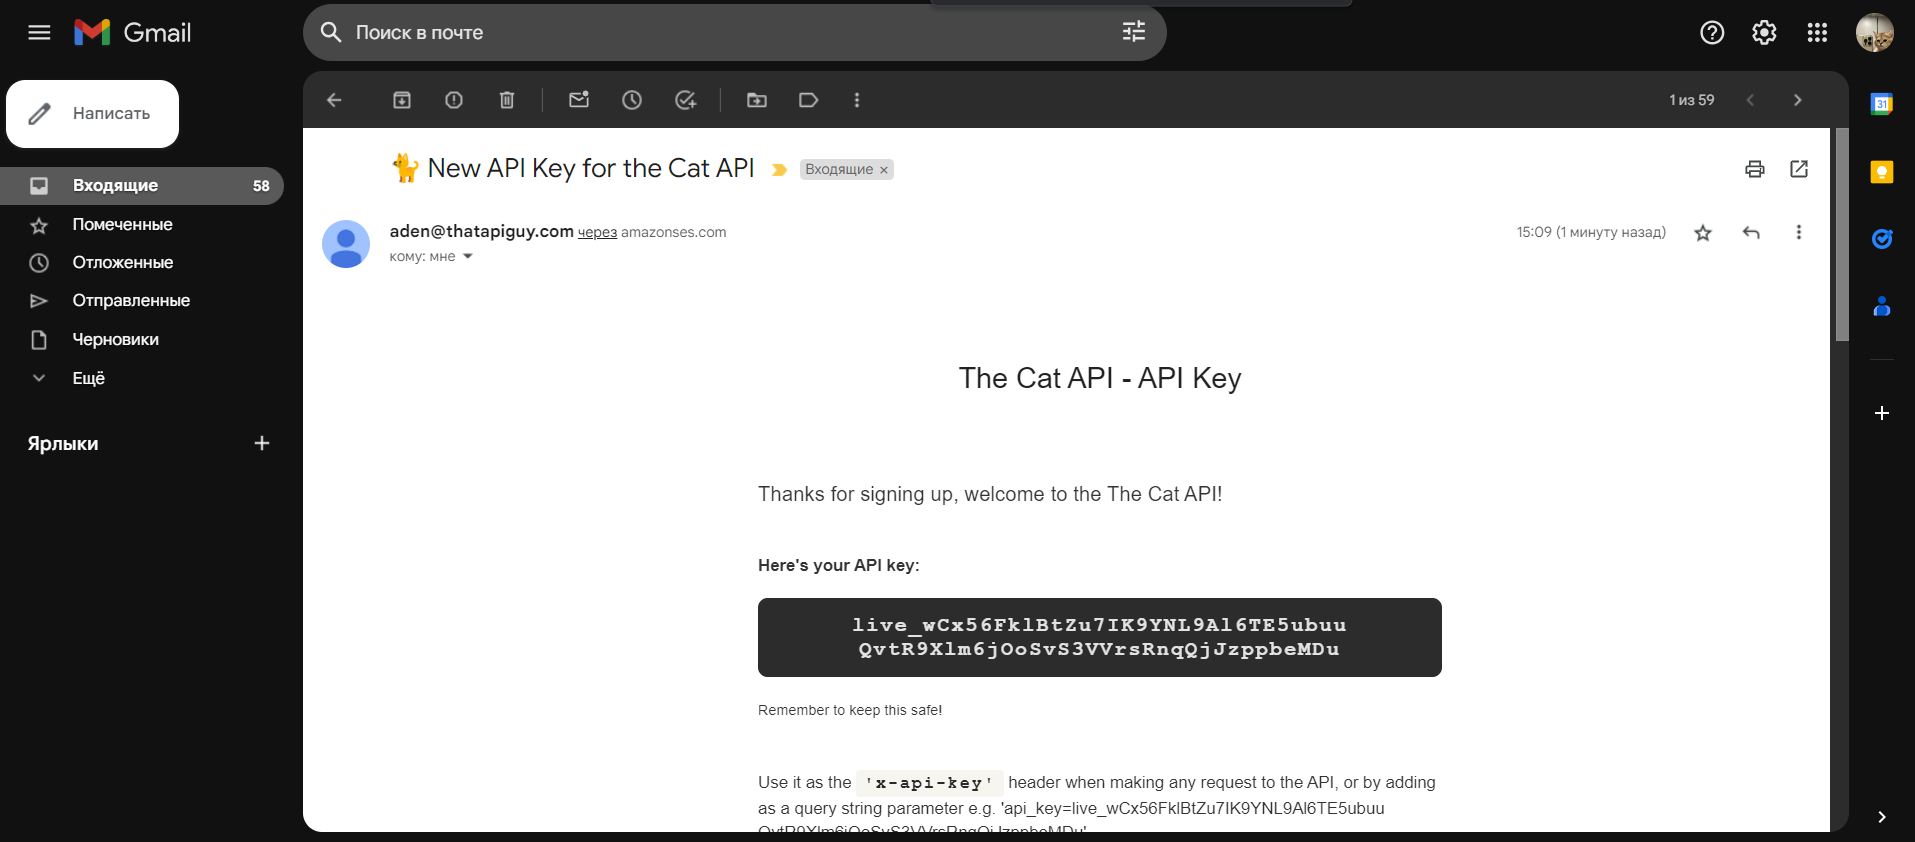

После с помощью постмана сделала запрос по API ключу:
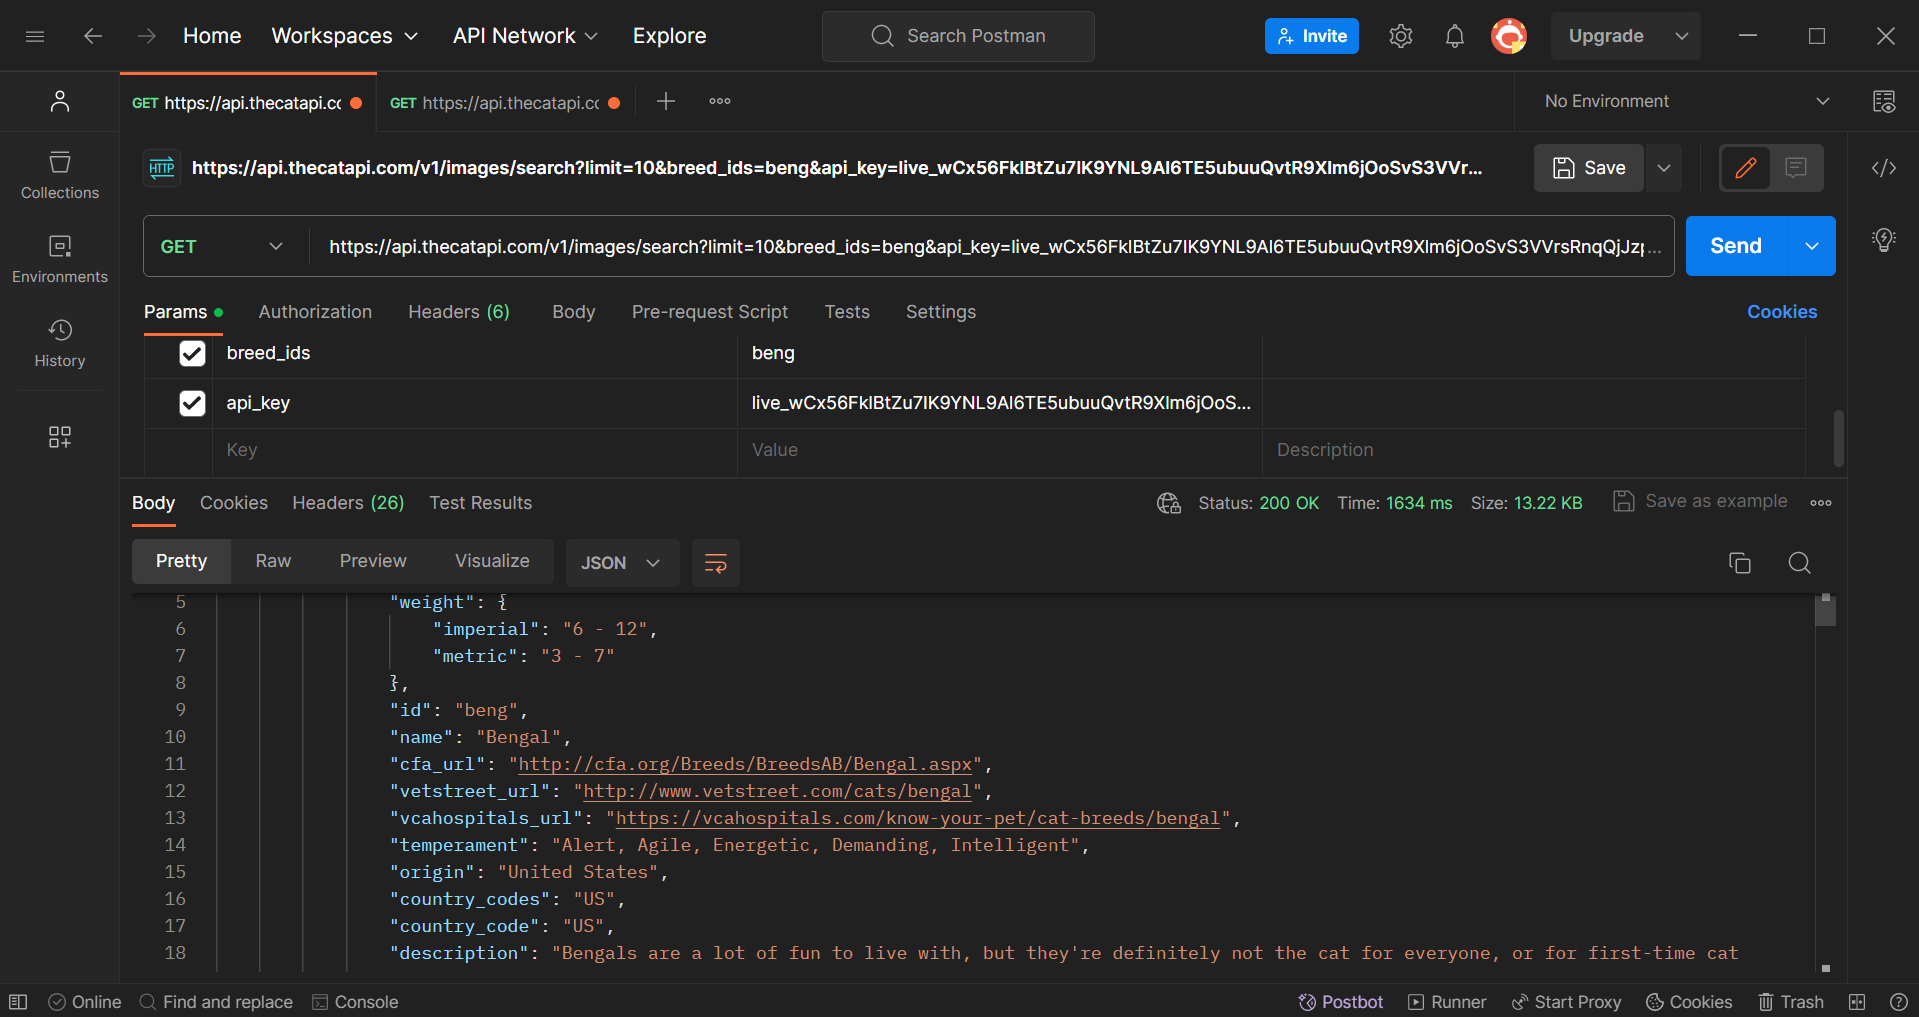

In [ ]:
#Curl method

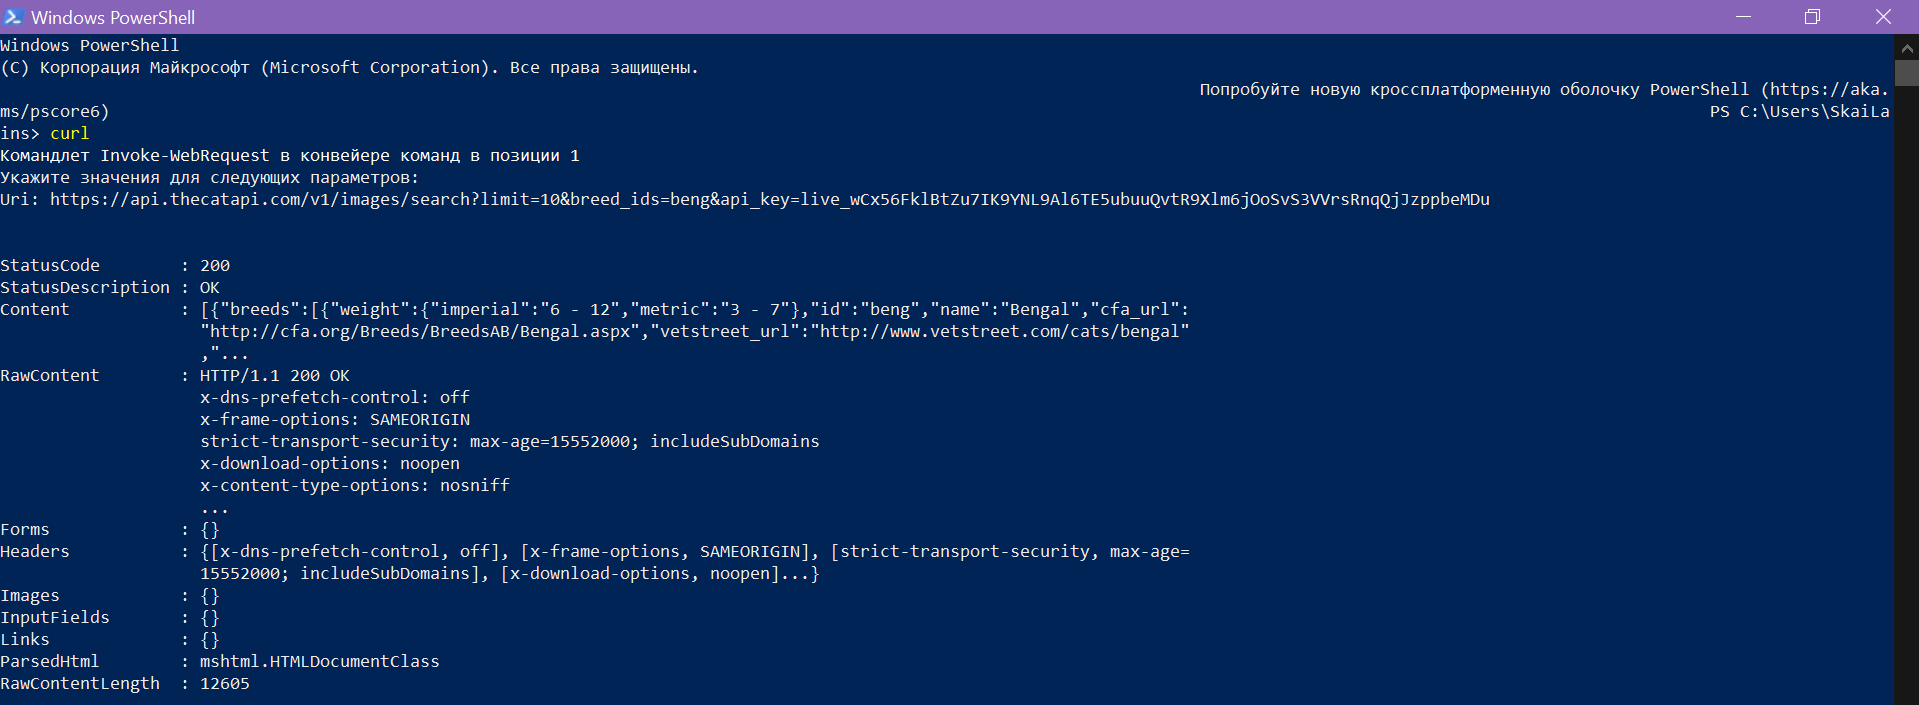